In [1]:
import numpy.linalg as nla
import scipy.linalg as sla
import numpy as np
from numpy import identity as id
from pylab import *
import cmath as cm
import random
import matplotlib.pyplot as plt
import cmath
from itertools import compress, product
from scipy import stats
import matplotlib.mlab as mlab

In [2]:
def Herm(A):
    A = np.transpose(np.conj(A))
    return A

def NKron(*args):
  """Calculate a Kronecker product over a variable number of inputs"""
  result = np.array([[1.0]])
  for op in args:  
    result = np.kron(result, op)
  return result

def Poisson(x):
    alpha=1
    y = alpha/(1+x)**2
    return y

def GOE(x):
    Q = 3.375*((x+x**(2))/(1+x+x**(2))**(2.5))
    return Q

def GUE(x):
    Z=float((4.0*np.pi)/(81.0*np.sqrt(3))); B=2
    P = (1/Z)*(((x+x**2)**B)/((1+x+x**2)**(1+(3*B)/2)))
    return P
    

#Spin states in the z-basis
up = np.array([1, 0])
down = np.array([0, 1])
Spin=[up,down]
#Spin matrices
PX = np.array([[0, 1],[ 1, 0]])
PZ = np.array([[1, 0],[0, -1]])
PY = np.array([[0, -1.0*cm.sqrt(-1.0)], [cm.sqrt(-1.0), 0]])

def Ham(N):
    
    H=np.zeros((2**N,2**N), dtype=np.complex128)
    H=H+J*(NKron(PX,PX,id(2**(N-2)))+NKron(id(2**(N-2)),PX,PX)+NKron(PY,PY,id(2**(N-2)))+NKron(id(2**(N-2)),PY,PY)) + U*(NKron(PZ,PZ,id(2**(N-2)))+NKron(id(2**(N-2)),PZ,PZ))
    i=1
    while i<N-1:
        H=H+J*(NKron(id(2**i),PX,PX,id(2**(N-2-i))))
        H=H+J*(NKron(id(2**i),PY,PY,id(2**(N-2-i))))
        H=H+U*(NKron(id(2**i),PZ,PZ,id(2**(N-2-i))))
        i+=1
    i=0
    while i<N:
        H=H+random.uniform(-h,h)*(NKron(id(2**i),PZ,id(2**(N-i-1))))
        H=H+Xi*(NKron(id(2**i),PX,id(2**(N-i-1))))
        i+=1
    
    EigVals = nla.eigvalsh(H)
    return EigVals


In [3]:
Values=[]
Repeats=1000
J=1
U=0.5
N=int(12)
h=1
Time=10
t=0.01
Xi=0.5
Basis=[]
SpinTot=[]
Ratio=[]
Average=[]
Mean=[]
RatioVector=[]



Ratio=[]
R=0
while R<Repeats:
    EigVals = Ham(N)
    """
    i=1
    while i<2**(N)-1:
        Variable1 = EigVals[i]-EigVals[i-1]
        Variable2= EigVals[i+1] - EigVals[i]
        Ratio.append(min(Variable1,Variable2)/max(Variable1,Variable2))
        i+=1
    """
    
    i=0
    while i<2**(N)-2:
        Variable1 = EigVals[i+1]-EigVals[i+2]
        Variable2 = EigVals[i]-EigVals[i+1]
        if float(Variable1/Variable2)>25:
            i+=1
        else:
            Ratio.append(float(Variable1/Variable2))
            i+=1

    R+=1
    if R%25==0:
        print(R)
    

x=np.linspace(0,10,1000)
y=Poisson(x)
z=GOE(x)
u=GUE(x)
np.savetxt('Ratio_chi-0.5_h-1_N12.txt', Ratio)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000


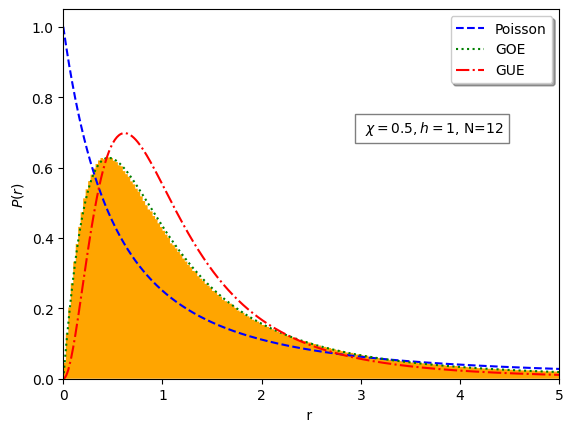

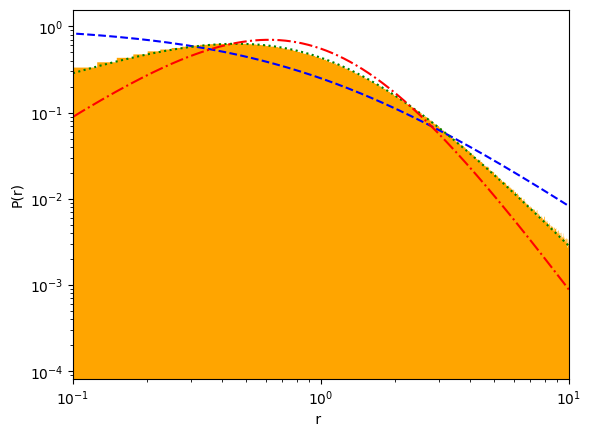

In [11]:
plt.plot(x,y, 'b--', label='Poisson')
plt.plot(x,z, 'g:', label='GOE')
plt.plot(x,u, 'r-.', label='GUE')
plt.xlim((0,5))
plt.hist(Ratio,bins=1000, density=True, histtype='stepfilled', color='orange')
plt.xlabel(' r  ')
plt.ylabel(r'$ P(r) $')
plt.legend(loc='upper right', shadow = True)
plt.text(3, 0.7, r' $ \chi=%s, h=%s$, N=%s' %(Xi,h,N),  bbox=dict(facecolor='white', alpha=0.5))
plt.savefig('Lin_chi-0.5_h-1_N12.png', dpi = 600, bbox_inches='tight')
plt.show()


plt.plot(x,y, 'b--')
plt.plot(x,z, 'g:')
plt.plot(x,u, 'r-.')
plt.xlim((0.1,10))
plt.hist(Ratio,bins=1000, density=True, histtype='stepfilled', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(' r  ')
plt.ylabel('P(r)')
plt.savefig('Log_chi-0.5_h-1_N12.png', dpi = 600, bbox_inches='tight')
plt.show()

In [12]:
np.savetxt('Ratio_chi-0.5_h-1_N12.txt', Ratio)

In [13]:
Values=[]
Repeats=1000
J=1
U=0.5
N=int(12)
h=10
Time=10
t=0.01
Xi=0.5
Basis=[]
SpinTot=[]
Ratio=[]
Average=[]
Mean=[]
RatioVector=[]



Ratio=[]
R=0
while R<Repeats:
    EigVals = Ham(N)
    """
    i=1
    while i<2**(N)-1:
        Variable1 = EigVals[i]-EigVals[i-1]
        Variable2= EigVals[i+1] - EigVals[i]
        Ratio.append(min(Variable1,Variable2)/max(Variable1,Variable2))
        i+=1
    """
    
    i=0
    while i<2**(N)-2:
        Variable1 = EigVals[i+1]-EigVals[i+2]
        Variable2 = EigVals[i]-EigVals[i+1]
        if float(Variable1/Variable2)>25:
            i+=1
        else:
            Ratio.append(float(Variable1/Variable2))
            i+=1

    R+=1
    if R%25==0:
        print(R)
    

x=np.linspace(0,10,1000)
y=Poisson(x)
z=GOE(x)
u=GUE(x)
np.savetxt('Ratio_chi-0.5_h-10_N12.txt', Ratio)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000


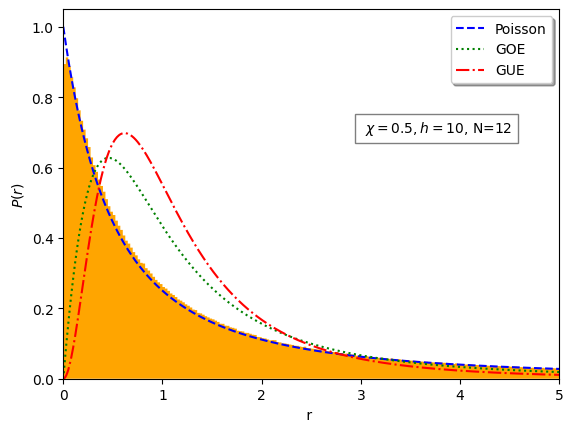

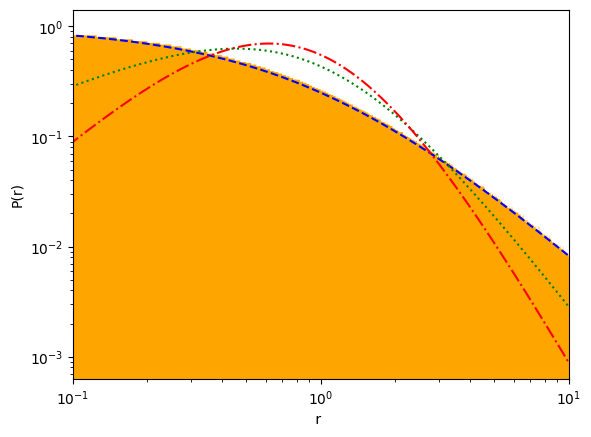

In [14]:
plt.plot(x,y, 'b--', label='Poisson')
plt.plot(x,z, 'g:', label='GOE')
plt.plot(x,u, 'r-.', label='GUE')
plt.xlim((0,5))
plt.hist(Ratio,bins=1000, density=True, histtype='stepfilled', color='orange')
plt.xlabel(' r  ')
plt.ylabel(r'$ P(r) $')
plt.legend(loc='upper right', shadow = True)
plt.text(3, 0.7, r' $ \chi=%s, h=%s$, N=%s' %(Xi,h,N),  bbox=dict(facecolor='white', alpha=0.5))
plt.savefig('Lin_chi-0.5_h-10_N12.png', dpi = 600, bbox_inches='tight')
plt.show()


plt.plot(x,y, 'b--')
plt.plot(x,z, 'g:')
plt.plot(x,u, 'r-.')
plt.xlim((0.1,10))
plt.hist(Ratio,bins=1000, density=True, histtype='stepfilled', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(' r  ')
plt.ylabel('P(r)')
plt.savefig('Log_chi-0.5_h-10_N12.png', dpi = 600, bbox_inches='tight')
plt.show()